In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../dados/youtube/comentarios1.csv')

In [3]:
df_grouped = df.groupby('channel').count()[['cid']].reset_index().rename(columns = {'cid': 'comentarios'})
stats_df = df_grouped.groupby('comentarios').count().reset_index().rename(columns = {'channel': 'frequencia'})
stats_df['pdf'] = stats_df['frequencia'] / sum(stats_df['frequencia'])
stats_df['cdf'] = stats_df['pdf'].cumsum()

In [4]:
stats_df

,comentarios,frequencia,pdf,cdf
0,1,23979,0.698038,0.698038
1,2,5277,0.153616,0.851653
2,3,1953,0.056853,0.908506
3,4,968,0.028179,0.936685
4,5,602,0.017524,0.954209
...,...,...,...,...
58,90,1,0.000029,0.999854
59,145,1,0.000029,0.999884
60,150,1,0.000029,0.999913
61,157,2,0.000058,0.999971


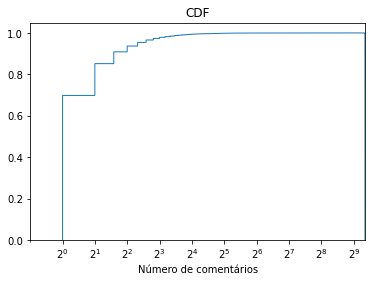

In [5]:
plt.hist(df_grouped['comentarios'], bins=df_grouped['comentarios'].max()+1, 
         density=True, cumulative=True, histtype='step')
plt.xlim(0, df_grouped['comentarios'].max())
plt.xscale('symlog', basex=2)
plt.xticks([2**i for i in range(0,10)])
plt.xlabel('Número de comentários')
plt.title('CDF')
plt.show()

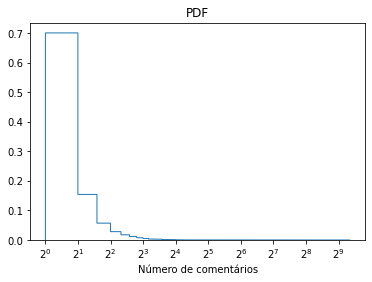

In [6]:
plt.hist(df_grouped['comentarios'], bins=df_grouped['comentarios'].max()+1, density=True, histtype='step')
plt.xscale('symlog', basex=2)
plt.xticks([2**i for i in range(0,10)])
plt.xlabel('Número de comentários')
plt.title('PDF')
plt.show()